In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle

# READING DATA

## What Does it Take to get into the NBA Hall of Fame?

In [5]:
file_path = 'data/Hall-of-fame-train.csv'

df = pd.read_csv(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   league          495 non-null    object
 1   games           495 non-null    int64 
 2   minutes         495 non-null    int64 
 3   pts             495 non-null    int64 
 4   offReb          495 non-null    int64 
 5   defReb          495 non-null    int64 
 6   reb             495 non-null    int64 
 7   asts            495 non-null    int64 
 8   stl             495 non-null    int64 
 9   blk             495 non-null    int64 
 10  turnover        495 non-null    int64 
 11  pf              495 non-null    int64 
 12  fga             495 non-null    int64 
 13  fgm             495 non-null    int64 
 14  fta             495 non-null    int64 
 15  ftm             495 non-null    int64 
 16  tpa             495 non-null    int64 
 17  tpm             495 non-null    int64 
 18  totalSeaso

# DATA EXPLORATION

In [6]:
df.describe()

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,fta,ftm,tpa,tpm,totalSeasons,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,279.462626,6892.183838,3249.357576,236.006061,541.729293,1374.705051,731.545455,164.159596,87.652525,291.529293,...,949.022222,713.357576,153.311111,52.395960,5.357576,1974.947475,1979.305051,0.888889,24.694949,0.090909
std,303.704033,9720.614594,5068.983382,572.440731,1107.931022,2584.368206,1293.869629,299.897575,217.612488,534.446441,...,1578.948315,1185.263900,470.261475,171.280817,4.461647,16.935973,17.555634,0.314588,17.555634,0.287771
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1946.000000,1946.000000,0.000000,0.000000,0.000000
25%,46.000000,295.500000,143.000000,0.000000,0.000000,49.500000,29.000000,0.000000,0.000000,0.000000,...,44.500000,29.000000,0.000000,0.000000,1.000000,1963.000000,1968.000000,1.000000,9.000000,0.000000
50%,151.000000,2132.000000,907.000000,13.000000,51.000000,374.000000,190.000000,16.000000,5.000000,38.000000,...,299.000000,199.000000,2.000000,0.000000,4.000000,1974.000000,1979.000000,1.000000,25.000000,0.000000
75%,439.000000,10102.500000,4115.000000,240.000000,621.000000,1617.500000,881.500000,186.500000,66.500000,327.000000,...,1077.500000,798.000000,42.000000,9.000000,9.000000,1989.000000,1995.000000,1.000000,36.000000,0.000000
max,1611.000000,47859.000000,31419.000000,6731.000000,10117.000000,23924.000000,9887.000000,2207.000000,2361.000000,3804.000000,...,11862.000000,8531.000000,3434.000000,1301.000000,21.000000,2004.000000,2004.000000,1.000000,58.000000,1.000000


There are no missing values
There are players that only played one game and didn't get any minutes on the court, which is interesting

c:\Users\tarun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tarun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tarun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tarun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

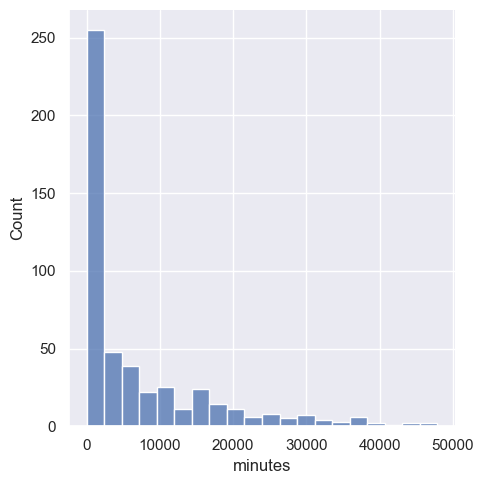

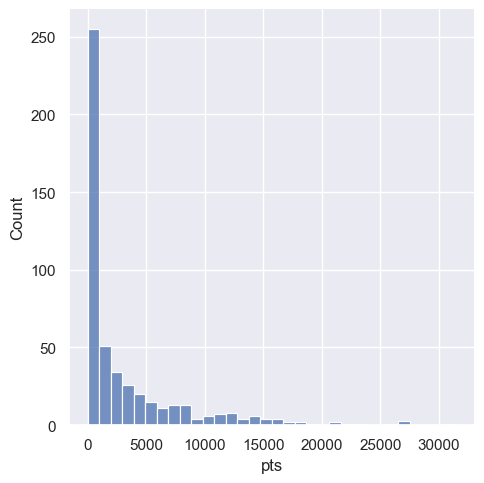

In [12]:
sns.displot(df['minutes'])
sns.displot(df['pts'])

A majority of NBA players don't get minutes on the court and also don't score points.

Skewness: 2.855
Kurtosis: 6.174
count    495.000000
mean       0.090909
std        0.287771
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: class, dtype: float64


c:\Users\tarun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tarun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


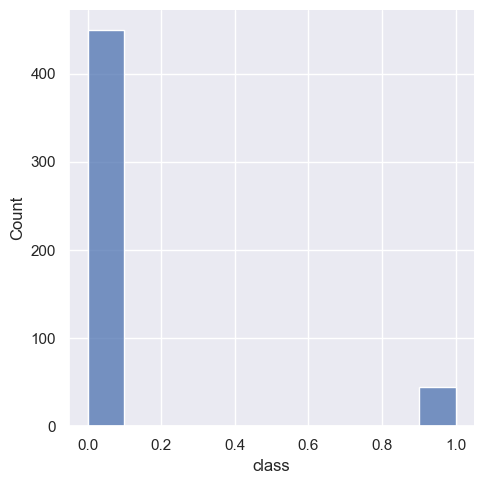

In [8]:
# checking the target variable: class

print("Skewness: %.3f" % df['class'].skew())
print("Kurtosis: %.3f" % df['class'].kurt())

print(df['class'].describe())
sns.displot(df['class'])

The target variable is binary as expected. 
A majority of players have a class of 0, meaning they have not entered the NBA Hall of Fame.

In [ ]:
#It might make sense to adjust the distribution of the class variable to be more evenly distributed (only for training data, not testing)